In [1]:
import pandas as pd
matches = pd.read_csv(r"C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\data\match_w_pred_2223diff_trsh4s.csv", index_col=0)
matches

,opponent,team,date,time,round,day,venue,result,gf,ga,target,y_pred,y_prob
0,Arsenal,Aston Villa,2022-08-31,19:30:00,Matchweek 5,Wed,Away,L,1,2,0,0,0.128631
1,Arsenal,Aston Villa,2023-02-18,12:30:00,Matchweek 24,Sat,Home,L,2,4,0,0,0.204987
2,Arsenal,Bournemouth,2022-08-20,17:30:00,Matchweek 3,Sat,Home,L,0,3,0,0,0.099119
3,Arsenal,Bournemouth,2023-03-04,15:00:00,Matchweek 26,Sat,Away,L,2,3,0,0,0.059258
4,Arsenal,Brentford,2022-09-18,12:00:00,Matchweek 8,Sun,Home,L,0,3,0,0,0.141576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Wolves,Southampton,2023-02-11,15:00:00,Matchweek 23,Sat,Home,L,1,2,0,0,0.309233
756,Wolves,Tottenham,2022-08-20,12:30:00,Matchweek 3,Sat,Home,W,1,0,1,1,0.724369
757,Wolves,Tottenham,2023-03-04,15:00:00,Matchweek 26,Sat,Away,L,0,1,0,1,0.600735
758,Wolves,West Ham,2022-10-01,17:30:00,Matchweek 9,Sat,Home,W,2,0,1,1,0.623270


In [2]:
odds = pd.read_csv(r"C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\data\match_w_odds_2223.csv", index_col=[0,1,2])
odds

date  \
league             season game                                                      
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal   2022-08-05 20:00:00   
                          2022-08-06 Bournemouth-Aston Villa  2022-08-06 15:00:00   
                          2022-08-06 Everton-Chelsea          2022-08-06 17:30:00   
                          2022-08-06 Fulham-Liverpool         2022-08-06 12:30:00   
                          2022-08-06 Leeds United-Wolves      2022-08-06 15:00:00   
...                                                                           ...   
                          2023-05-28 Everton-Bournemouth      2023-05-28 16:30:00   
                          2023-05-28 Leeds United-Tottenham   2023-05-28 16:30:00   
                          2023-05-28 Leicester City-West Ham  2023-05-28 16:30:00   
                          2023-05-28 Manchester Utd-Fulham    2023-05-28 16:30:00   
                          2023-05-28 Southampton-Liverpool    2023-05-28 16:30:00   

                                                                   home_team  \
league             season game                                                 
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal   Crystal Palace   
                          2022-08-06 Bournemouth-Aston Villa     Bournemouth   
                          2022-08-06 Everton-Chelsea                 Everton   
                          2022-08-06 Fulham-Liverpool                 Fulham   
                          2022-08-06 Leeds United-Wolves        Leeds United   
...                                                                      ...   
                          2023-05-28 Everton-Bournemouth             Everton   
                          2023-05-28 Leeds United-Tottenham     Leeds United   
                          2023-05-28 Leicester City-West Ham  Leicester City   
                          2023-05-28 Manchester Utd-Fulham    Manchester Utd   
                          2023-05-28 Southampton-Liverpool       Southampton   

                                                                away_team  \
league             season game                                              
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal       Arsenal   
                          2022-08-06 Bournemouth-Aston Villa  Aston Villa   
                          2022-08-06 Everton-Chelsea              Chelsea   
                          2022-08-06 Fulham-Liverpool           Liverpool   
                          2022-08-06 Leeds United-Wolves           Wolves   
...                                                                   ...   
                          2023-05-28 Everton-Bournemouth      Bournemouth   
                          2023-05-28 Leeds United-Tottenham     Tottenham   
                          2023-05-28 Leicester City-West Ham     West Ham   
                          2023-05-28 Manchester Utd-Fulham         Fulham   
                          2023-05-28 Southampton-Liverpool      Liverpool   

                                                              B365H  B365D  \
league             season game                                               
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal    4.20   3.60   
                          2022-08-06 Bournemouth-Aston Villa   3.75   3.50   
                          2022-08-06 Everton-Chelsea           5.50   4.00   
                          2022-08-06 Fulham-Liverpool         11.00   6.00   
                          2022-08-06 Leeds United-Wolves       2.25   3.40   
...                                                             ...    ...   
                          2023-05-28 Everton-Bournemouth       1.50   4.50   
                          2023-05-28 Leeds United-Tottenham    2.75   3.80   
                          2023-05-28 Leicester City-West Ham   1.91   3.80   
                          2023-05-28 Manchester Utd-Fulham     1.50   

In [3]:
def add_key_col(hist):
    ew_game=hist['date'] +' ' + hist['team']+'-' + hist['opponent']
    # ew_game=hist['date'].dt.date.astype('string') +' ' + hist['home_team']+'-' + hist['away_team']
    return ew_game

matches['key']=add_key_col(matches)
matches=matches.set_index('key')

In [4]:
odds2=odds.droplevel([0,1]).iloc[:,-6:]

In [5]:
matches2=matches.join(odds2,rsuffix='v').dropna()

In [6]:
c1=matches2.target==matches2.y_pred
c2=matches2.target==1
c3=matches2.y_pred==1
matches2[c1&c2].count()



opponent    52
team        52
date        52
time        52
round       52
day         52
venue       52
result      52
gf          52
ga          52
target      52
y_pred      52
y_prob      52
AvgH        52
AvgD        52
AvgA        52
pAvgH       52
pAvgD       52
pAvgA       52
dtype: int64

In [7]:
tobet=matches2[c3]
tobet=tobet.sort_values('date')
sc=['date','result','gf','ga','target','y_prob','pAvgH','AvgH',]
tobet=tobet[sc]

In [8]:
e=1.35
m=1.7
d=2.7
c4e=matches2['AvgH'].between(0,e,'right')
c4m=matches2['AvgH'].between(e,m,'right')
c4d=matches2['AvgH'].between(m,d,'right')
c5=matches2['AvgH']>d

In [9]:
tobet.loc[c4e,'dif_level']='E'
tobet.loc[c4m,'dif_level']='M'
tobet.loc[c4d,'dif_level']='D'
tobet.loc[c5,'dif_level']='X'

C:\Users\krawc\AppData\Local\Temp\ipykernel_2080\3724367751.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'E' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tobet.loc[c4e,'dif_level']='E'


In [10]:
#check for value bets only
me=1.2
mm=1.5
md=2
c6e=matches2['AvgH']>me
c6m=matches2['AvgH']>mm
c6d=matches2['AvgH']>md

tobet=tobet[(c6e&c4e)|(c6m&c4m)|(c6d&c4d)]


C:\Users\krawc\AppData\Local\Temp\ipykernel_2080\2181427084.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tobet=tobet[(c6e&c4e)|(c6m&c4m)|(c6d&c4d)]


In [11]:

tobet['in']=100
tobet['out']=tobet['in']*tobet['AvgH']
tobet.loc[tobet['target']==0,'out']=0
tobet['win']=tobet['out']-tobet['in']
tobet['balance']=tobet.win.cumsum()
tobet

,date,result,gf,ga,target,y_prob,pAvgH,AvgH,dif_level,in,out,win,balance
key,,,,,,,,,,,,,
2022-08-13 Arsenal-Leicester City,2022-08-13,W,4,2,1,0.667881,0.629078,1.55,M,100,155.0,55.0,55.0
2022-08-27 Arsenal-Fulham,2022-08-27,W,2,1,1,0.610943,0.741581,1.32,E,100,132.0,32.0,87.0
2022-08-31 Liverpool-Newcastle Utd,2022-08-31,W,2,1,1,0.742770,0.746003,1.31,E,100,131.0,31.0,118.0
2022-09-16 Aston Villa-Southampton,2022-09-16,W,1,0,1,0.629666,0.461161,2.10,D,100,210.0,110.0,228.0
2022-10-02 Manchester City-Manchester Utd,2022-10-02,W,6,3,1,0.629956,0.723047,1.35,E,100,135.0,35.0,263.0
2022-10-22 Manchester City-Brighton,2022-10-22,W,3,1,1,0.733338,0.808329,1.21,E,100,121.0,21.0,284.0
2022-10-23 Tottenham-Newcastle Utd,2022-10-23,L,1,2,0,0.727001,0.463446,2.09,D,100,0.0,-100.0,184.0
2022-10-24 West Ham-Bournemouth,2022-10-24,W,2,0,1,0.642828,0.626155,1.55,M,100,155.0,55.0,239.0
2022-10-29 Liverpool-Leeds United,2022-10-29,L,1,2,0,0.766230,0.750403,1.30,E,100,0.0,-100.0,139.0


In [12]:
(tobet['target']==1).sum()#values.astype(int)

22

<Axes: xlabel='date'>

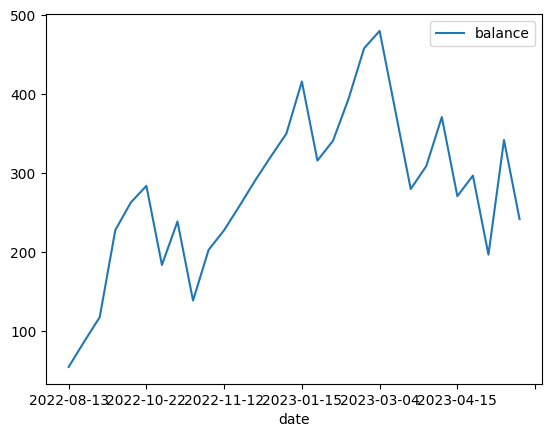

In [13]:
tobet.plot(x='date',y='balance',kind='line')

In [14]:
level_wins=tobet[c2].groupby('dif_level')['target'].sum()

C:\Users\krawc\AppData\Local\Temp\ipykernel_2080\3605488521.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  level_wins=tobet[c2].groupby('dif_level')['target'].sum()


In [15]:
level_lose=tobet[~c2].groupby('dif_level')['target'].count()
level_wins/(level_wins+level_lose)

C:\Users\krawc\AppData\Local\Temp\ipykernel_2080\1710927317.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  level_lose=tobet[~c2].groupby('dif_level')['target'].count()


dif_level
D    0.500000
E    0.866667
M    0.636364
Name: target, dtype: float64

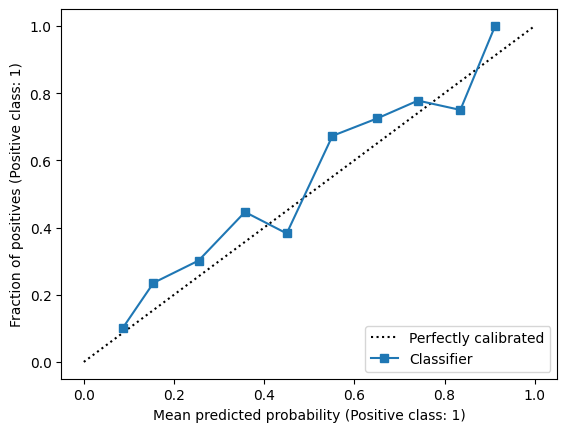

In [16]:

# matches2.y_prob
# matches2.pAvgH
# "Calibration plot ,Reliability diagram
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
CalibrationDisplay.from_predictions(matches2.target, matches2.pAvgH,n_bins=10)